In [1]:
# DataVengers_notebook_cleaning.ipynb
# -----------------------------------
# Task 2: Data Cleaning and Exploration

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Make sure all columns are visible when we display the data
pd.set_option('display.max_columns', None)

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [3]:
# Path to the dataset (inside 'original_dataset' folder)
data_path =(r"C:\Users\LENOVO\DataVengers Task 2\original_dataset\Train.csv.zip")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(data_path)

# Show the first 5 rows to confirm it loaded correctly
print("✅ Dataset loaded successfully! Here are the first 5 rows:")
df.head()


✅ Dataset loaded successfully! Here are the first 5 rows:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# Check basic info about the dataset
print("🔹 Basic Information:")
df.info()

# Statistical summary for numerical columns
print("\n🔹 Statistical Summary:")
df.describe()


🔹 Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

🔹 Statistical Summary:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
# Count missing (NaN) values in each column
print("🔹 Missing values in each column:")
print(df.isnull().sum())

# Count duplicate rows
dup_count = df.duplicated().sum()
print(f"\n🔹 Number of duplicate rows: {dup_count}")


🔹 Missing values in each column:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

🔹 Number of duplicate rows: 0


In [6]:
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print("✅ Duplicate rows removed!")
else:
    print("✅ No duplicate rows found.")


✅ No duplicate rows found.


In [7]:
# Fill missing numeric values with mean of each column
df = df.fillna(df.mean(numeric_only=True))

# For non-numeric (categorical) columns, fill with the mode (most frequent value)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("✅ Missing values handled successfully!")


✅ Missing values handled successfully!


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22500\2695808841.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], inplace=True)


In [8]:
print("🔹 Missing values after cleaning:")
print(df.isnull().sum())

print("\n🔹 Duplicate rows after cleaning:", df.duplicated().sum())


🔹 Missing values after cleaning:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

🔹 Duplicate rows after cleaning: 0


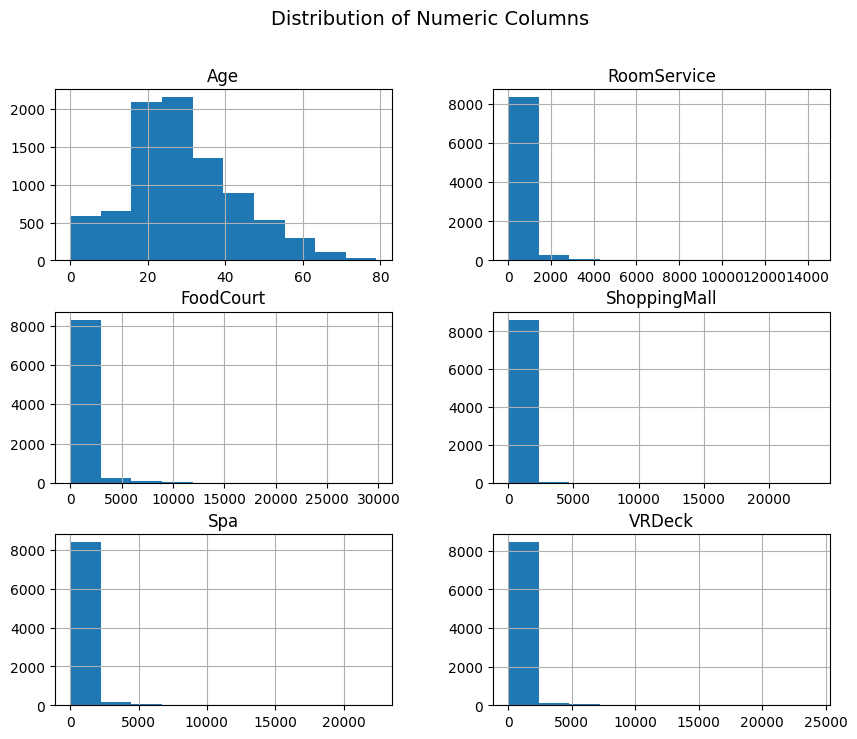

🔹 Correlation matrix (first 5 columns shown):
             CryoSleep       Age       VIP  RoomService  FoodCourt
CryoSleep     1.000000 -0.070736 -0.078281    -0.243986  -0.205682
Age          -0.070736  1.000000  0.091574     0.067612   0.127937
VIP          -0.078281  0.091574  1.000000     0.056595   0.126006
RoomService  -0.243986  0.067612  0.056595     1.000000  -0.015521
FoodCourt    -0.205682  0.127937  0.126006    -0.015521   1.000000


In [9]:
# Quick look at how numerical data is distributed
df.hist(figsize=(10, 8))
plt.suptitle("Distribution of Numeric Columns", fontsize=14)
plt.show()

# Check correlation between numeric features
corr_matrix = df.corr(numeric_only=True)
print("🔹 Correlation matrix (first 5 columns shown):")
print(corr_matrix.iloc[:5, :5])


In [10]:
# Ensure the cleaned_dataset folder exists
os.makedirs("cleaned_dataset", exist_ok=True)

# Save cleaned data
output_path = "cleaned_dataset/cleaned_dataset.csv"
df.to_csv(output_path, index=False)

print(f"✅ Cleaned dataset saved successfully at: {output_path}")


✅ Cleaned dataset saved successfully at: cleaned_dataset/cleaned_dataset.csv


In [11]:
# Load back and check the first few rows of the cleaned data
cleaned_df = pd.read_csv("cleaned_dataset/cleaned_dataset.csv")
print("🔹 Preview of cleaned dataset:")
cleaned_df.head()


🔹 Preview of cleaned dataset:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
